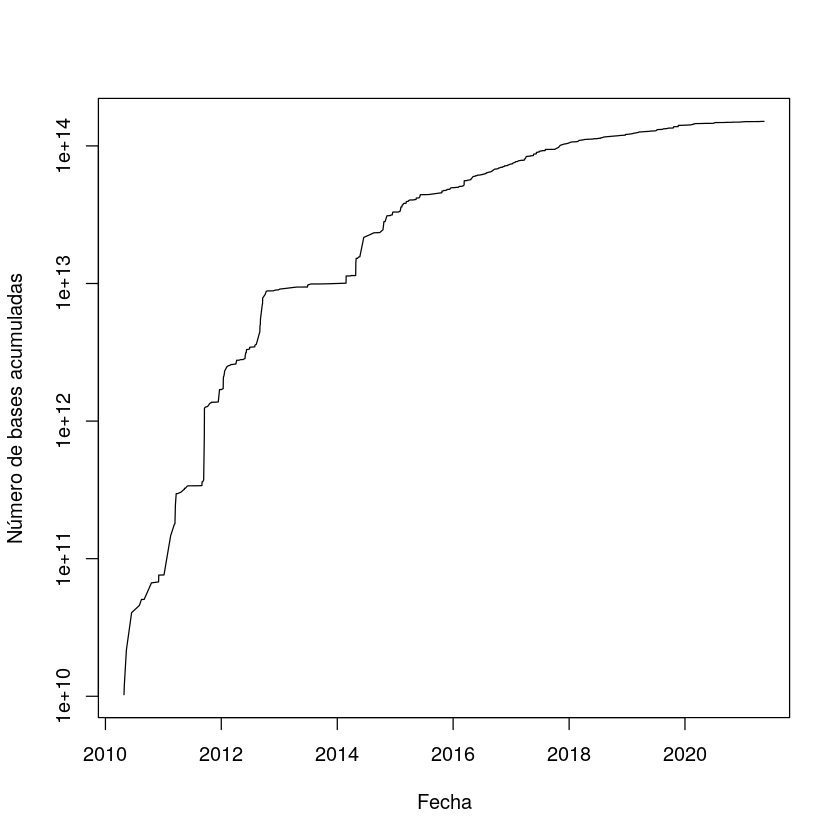

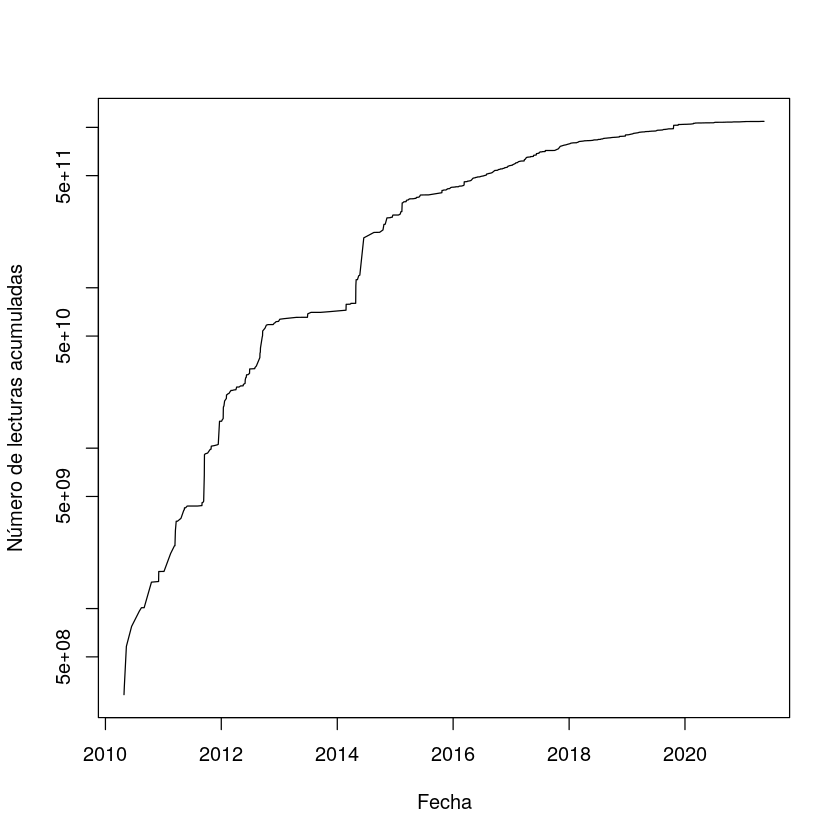

In [2]:
library('curl')
library('plyr')

portal   <- 'https://www.ebi.ac.uk/ena/portal/api/'
endpoint <- 'search?'
result   <- 'result=read_run'
fields   <- '&fields=first_public,read_count,base_count'
limit    <- '&limit=100000'
URL <- paste0(portal, endpoint, result, fields, limit, collapse='')
curl_download(URL, destfile = 'readRun.tsv')

# Una vez descargado el archivo, es necesario echarle un vistazo
# para ver su formato. Sólo entonces podemos decirle a R cómo
# tiene que leerlo.

readRun <- read.table('readRun.tsv', header = TRUE,
                     colClasses = c('character','character','Date','numeric','numeric'),
                     sep = '\t', na.strings = '')

PorFecha <- ddply(.data = readRun,
                  .variables = 'first_public',
                  .fun = function(x) data.frame(bases = sum(x$base_count, na.rm=TRUE),
                                                lecturas = sum(x$read_count, na.rm=TRUE),
                                                registros = nrow(x)))
PorFecha$basesAcumuladas <- cumsum(PorFecha$bases)
PorFecha$lecturasAcumuladas <- cumsum(PorFecha$lecturas)
PorFecha$registrosAcumulados <- cumsum(PorFecha$registros)

plot(PorFecha$first_public, PorFecha$basesAcumuladas, log='y', type='l',
    xlab = 'Fecha', ylab = 'Número de bases acumuladas')

plot(PorFecha$first_public, PorFecha$lecturasAcumuladas, log='y', type='l',
    xlab = 'Fecha', ylab = 'Número de lecturas acumuladas')
